In [ ]:
import os
import pandas as pd
import re
import constants
import os
import requests
import pandas as pd
import multiprocessing
import time
from time import time as timer
from tqdm import tqdm
import numpy as np
from pathlib import Path
from functools import partial
import requests
import urllib
from PIL import Image


In [ ]:
DATASET_FOLDER = '../dataset/'
train = pd.read_csv(os.path.join(DATASET_FOLDER, '/content/train_sample.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, '/content/test_sample.csv'))
# sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
# sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

In [ ]:
!ls

drive  sample_data  test_sample.csv  train_sample.csv  utils.py


In [ ]:
import sys
sys.path.append('/content')


In [ ]:
!mv utils.py my_utils.py


In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=40e0073ed8b62375bb926f5603a43134c87cc399dfd4213bc07d0bec00a13086
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
from my_utils import download_images


In [ ]:
download_images(test['image_link'], '../images')

100%|██████████| 6000/6000 [00:52<00:00, 114.38it/s]


In [ ]:
import os

# Create directory for images
image_folder = '/content/images'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# Download images and save them in the new folder
download_images(test['image_link'], image_folder)


100%|██████████| 6000/6000 [00:51<00:00, 115.53it/s]


In [ ]:
!zip -r /content/images.zip /content/images
from google.colab import files
files.download('/content/images.zip')


Streaming output truncated to the last 5000 lines.
  adding: content/images/61QJVhqwZCL.jpg (deflated 6%)
  adding: content/images/51tndLn5WYL.jpg (deflated 5%)
  adding: content/images/A17feaGLe5L.jpg (deflated 2%)
  adding: content/images/81X0CxJFLVL.jpg (deflated 3%)
  adding: content/images/513P+QL4IiL.jpg (deflated 10%)
  adding: content/images/61AM9QtJXrL.jpg (deflated 2%)
  adding: content/images/71a+dh9OvpS.jpg (deflated 4%)
  adding: content/images/71PeIXAbaJL.jpg (deflated 0%)
  adding: content/images/618B+xUWF0L.jpg (deflated 2%)
  adding: content/images/81GrIK5LsZL.jpg (deflated 3%)
  adding: content/images/81KgVLMPBJL.jpg (deflated 18%)
  adding: content/images/71n2kI5bTGL.jpg (deflated 14%)
  adding: content/images/51PK0pLu0KL.jpg (deflated 36%)
  adding: content/images/71zOz3Vl6qL.jpg (deflated 3%)
  adding: content/images/5175cqXkSBL.jpg (deflated 6%)
  adding: content/images/612pRxwJpWL.jpg (deflated 4%)
  adding: content/images/61zwKqSJyFL.jpg (deflated 5%)
  adding: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

# Create directory for images
image_folder = '/content/train_images'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# Download images and save them in the new folder
download_images(train['image_link'], image_folder)


100%|██████████| 24000/24000 [02:22<00:00, 168.27it/s]


In [ ]:
!pip install paddlepaddle
!pip install paddleocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 85.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=8d51d0ba0b2f436cd1f43419d7eb47a0867c51fa173d31bdc0201c051eb2602d
  Stored in d

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 236kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:11<00:00, 890kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 138kiB/s]

[2024/09/13 12:37:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

[2024/09/13 12:37:11] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.3244953155517578
[2024/09/13 12:37:11] ppocr DEBUG: cls num  : 4, elapsed : 0.051249027252197266
[2024/09/13 12:37:12] ppocr DEBUG: rec_res num  : 4, elapsed : 0.7603292465209961


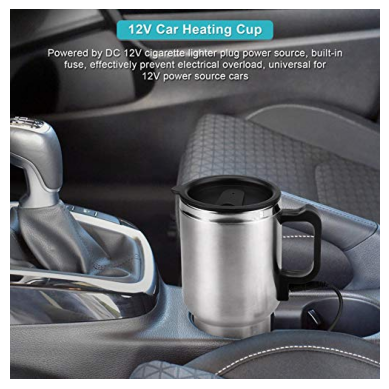

Recognized Text:  12VCar Heating Cup Powered by DC 12V cigarettelighter piug power source,built-in fuse,effectively prevent electrical overload,universal for 12V power source cars


In [ ]:
import requests
from PIL import Image as PILImage
import numpy as np
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt

"""
Paddle OCR
"""
def ocr_with_paddle(img_url):
    finaltext = ''
    ocr = PaddleOCR(lang='en', use_angle_cls=True)

    # Download the image from the URL
    response = requests.get(img_url, stream=True)
    img = PILImage.open(response.raw).convert("RGB")

    # Convert PIL Image to numpy array (OpenCV format)
    img_np = np.array(img)

    # Perform OCR
    result = ocr.ocr(img_np)

    # Extract text from the result
    for i in range(len(result[0])):
        text = result[0][i][1][0]
        finaltext += ' ' + text

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

    return finaltext

# Example usage
img_url = 'https://m.media-amazon.com/images/I/514pScQdlCL.jpg'
recognized_text = ocr_with_paddle(img_url)
print("Recognized Text:", recognized_text)


In [ ]:
import os

# Specify the folder containing the images
image_folder = '/content/train_images'

# Count the number of image files in the folder
num_images = len([f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))])

print(f'Total number of images: {num_images}')


Total number of images: 23875


In [ ]:
import pandas as pd

# Load the CSV file
train_sample = pd.read_csv('/content/train_sample.csv')

# Display the first few rows to get an overview
train_sample.head()


,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/51Xpo4Bhq-...,375816,item_weight,210.0 gram
1,https://m.media-amazon.com/images/I/51oFNjFSg0...,630869,item_weight,14.0 gram
2,https://m.media-amazon.com/images/I/712NkuZwuU...,192132,item_weight,0.0 gram
3,https://m.media-amazon.com/images/I/81iCxNYnfY...,281678,item_weight,100.0 gram
4,https://m.media-amazon.com/images/I/51yFpJ-max...,523149,item_weight,6.0 gram


In [ ]:
train_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_link    24000 non-null  object
 1   group_id      24000 non-null  int64 
 2   entity_name   24000 non-null  object
 3   entity_value  24000 non-null  object
dtypes: int64(1), object(3)
memory usage: 750.1+ KB


In [ ]:
# Assuming you have already loaded the CSV into a pandas DataFrame
unique_group_ids = train_sample['group_id'].nunique()

print(f'Total number of unique group_id: {unique_group_ids}')


Total number of unique group_id: 694


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image as PILImage
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt

# Initialize PaddleOCR with GPU support
ocr = PaddleOCR(lang='en', use_angle_cls=True, use_gpu=True)  # Ensure use_gpu=True

def ocr_with_paddle(image_path):
    """
    Apply OCR on an image located at image_path.
    """
    finaltext = ''

    try:
        # Open the image file
        img = PILImage.open(image_path).convert("RGB")

        # Convert PIL Image to numpy array (OpenCV format)
        img_np = np.array(img)

        # Perform OCR
        result = ocr.ocr(img_np)

        if result:
            # Extract text from the result
            for line in result[0]:
                text = line[1][0]
                finaltext += ' ' + text
        else:
            print(f"Warning: No result returned for image {image_path}")

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

    return finaltext

# Load the CSV file
csv_file = '/content/train_sample_subset.csv'
df = pd.read_csv(csv_file)

# Create a list to store the extracted text
image_texts = []

# Process each image
for index, row in df.iterrows():
    img_filename = row['image_link'].split('/')[-1]  # Extract the filename from the URL
    img_path = os.path.join('/content/train_images', img_filename)  # Construct the path
    if os.path.exists(img_path):
        # Apply OCR and get text
        text = ocr_with_paddle(img_path)
        image_texts.append(text)
    else:
        image_texts.append('')  # If image not found, append empty string

# Add the extracted text to the DataFrame
df['image_text'] = image_texts

# Save the updated DataFrame to a new CSV file
output_csv_file = '/content/train_sample_with_text.csv'
df.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Streaming output truncated to the last 5000 lines.
[2024/09/13 13:28:01] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.05887246131896973
[2024/09/13 13:28:01] ppocr DEBUG: cls num  : 10, elapsed : 0.016536951065063477
[2024/09/13 13:28:01] ppocr DEBUG: rec_res num  : 10, elapsed : 0.03802227973937988
[2024/09/13 13:28:02] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.0583188533782959
[2024/09/13 13:28:02] ppocr DEBUG: cls num  : 20, elapsed : 0.037867069244384766
[2024/09/13 13:28:02] ppocr DEBUG: rec_res num  : 20, elapsed : 0.09649133682250977
[2024/09/13 13:28:02] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.0684361457824707
[2024/09/13 13:28:02] ppocr DEBUG: cls num  : 17, elapsed : 0.026427745819091797
[2024/09/13 13:28:02] ppocr DEBUG: rec_res num  : 17, elapsed : 0.07855558395385742
[2024/09/13 13:28:02] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.062183380126953125
[2024/09/13 13:28:02] ppocr DEBUG: cls num  : 8, elapsed : 0.01985645294189453
[2024/09/13 13:28:02] ppocr DEBUG: rec_re

In [ ]:
import pandas as pd

# Load the CSV file
csv_file = '/content/train_sample.csv'
df = pd.read_csv(csv_file)

# Select the first 7000 rows
df_subset = df.head(4000)

# Save the new DataFrame to a new CSV file
output_csv_file = '/content/train_sample_subset.csv'
df_subset.to_csv(output_csv_file, index=False)

print(f"New CSV file with 7000 rows saved to {output_csv_file}")


New CSV file with 7000 rows saved to /content/train_sample_subset.csv


In [ ]:
!pip install paddlepaddle-gpu
!pip install paddleocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.4 MB/s eta 0:00:00


In [ ]:
import paddle
paddle.device.cuda.device_count()


1

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/train_sample_with_text.csv')

# Display the first few rows to get an overview
df.head()

,image_link,group_id,entity_name,entity_value,image_text
0,https://m.media-amazon.com/images/I/51Xpo4Bhq-...,375816,item_weight,210.0 gram,"Cayffe Aloia CONFEZ 30 Net weight 210g 7,40Z ..."
1,https://m.media-amazon.com/images/I/51oFNjFSg0...,630869,item_weight,14.0 gram,6.5cm 6mm high polished stainless steel Weigh...
2,https://m.media-amazon.com/images/I/712NkuZwuU...,192132,item_weight,0.0 gram,150 PLAYING KISSES CARDS LOOFE FONDLES FUN AC...
3,https://m.media-amazon.com/images/I/81iCxNYnfY...,281678,item_weight,100.0 gram,PRESSORESEAL Tea land MANZANA CANELA TenegRO ...
4,https://m.media-amazon.com/images/I/51yFpJ-max...,523149,item_weight,6.0 gram,18mm Natural Stone 25mm Copper Open Ring Weig...


In [ ]:
import re
import pandas as pd
import numpy as np
from constants import entity_unit_map, allowed_units

In [ ]:
# import pandas as pd

# # Load the CSV file
# csv_file = '/content/harsh2.csv'
# df = pd.read_csv(csv_file)

# # Convert 'image_text' to lowercase
# df['image_text'] = df['image_text'].str.lower()

# # Define the entity names to drop
# entities_to_drop = {'width', 'height', 'depth'}

# # Filter out rows where 'entity_name' is in the set of entities to drop
# filtered_df = df[~df['entity_name'].isin(entities_to_drop)]

# # Save the filtered DataFrame to a new CSV file
# output_csv_file = '/content/filtered_harsh2.csv'
# filtered_df.to_csv(output_csv_file, index=False)

# print(f"Filtered CSV file saved to {output_csv_file}")


Filtered CSV file saved to /content/filtered_harsh2.csv


first


In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/filtered_harsh2.csv'
df1 = pd.read_csv(csv_file)

# Convert 'image_text' to lowercase
df1['image_text'] = df1['image_text'].str.lower()

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # Define regex patterns for different entities
    patterns = {
        'item_weight': r'(\d+\.?\d*)\s?(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t)',
        'width': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'height': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'depth': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'voltage': r'(\d+\.?\d*)\s?(kilovolt|millivolt|volt|kV|mV|V)',
        'wattage': r'(\d+\.?\d*)\s?(kilowatt|watt|kW|W)',
        'item_volume': r'(\d+\.?\d*)\s?(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|imperial gallon|litre|microlitre|millilitre|pint|quart|cL|ft³|in³|cup|dL|fl oz|gal|ig gal|L|µL|mL|pt|qt)'
    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and select appropriate value
    values = []
    for match in matches:
        value, unit = match
        value = float(value)
        # Convert unit abbreviations to full names
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce',
            'lb': 'pound', 't': 'ton', 'cm': 'centimetre', 'ft': 'foot',
            'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
            'kV': 'kilovolt', 'mv': 'millivolt', 'v': 'volt',
            'kW': 'kilowatt', 'w': 'watt', 'cl': 'centilitre',
            'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
            'dL': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon',
            'ig gal': 'imperial gallon', 'L': 'litre', 'µL': 'microlitre',
            'mL': 'millilitre', 'pt': 'pint', 'qt': 'quart'
        }.get(unit, unit)

        values.append((value, unit))

    if not values:
        return None

    # Handle special cases
    if entity_name in {'item_weight', 'item_volume', 'voltage', 'wattage'}:
        # Find the maximum value for item_weight, item_volume, voltage, or wattage
        values.sort(key=lambda x: x[0], reverse=True)
        return f"{values[0][0]} {values[0][1]}"

    if entity_name in {'width', 'height', 'depth'}:
        # Find the appropriate value based on position
        if entity_name == 'depth':
            return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
            if len(values) == 2:
                return f"{values[1][0]} {values[1][1]}"
            elif len(values) >= 3:
                return f"{values[1][0]} {values[1][1]}"
        else:  # width
            return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['prediction'] = df1.apply(lambda row: extract_value_unit(str(row['entity_name']), str(row['image_text'])), axis=1)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/train_sample_with_extracted_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/train_sample_with_extracted_values.csv


used for 35%

In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/harsh2.csv'
df1 = pd.read_csv(csv_file)
# Convert 'image_text' to lowercase
# df1['output_text'] = df1['output_text'].str.lower()
df1['image_text'] = df1['image_text'].str.lower()
# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # Define regex patterns for different entities
    patterns = {
        'item_weight': r'(\d+\.?\d*)\s?(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t|KG|Kg|G|MG)',
        'width': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'height': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'depth': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'voltage': r'(\d+\.?\d*)\s?(kilovolt|millivolt|volt|kV|mV|V|v|mv|kv)',
        'wattage': r'(\d+\.?\d*)\s?(kilowatt|watt|kW|W)',
        'item_volume': r'(\d+\.?\d*)\s?(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|imperial gallon|litre|microlitre|millilitre|pint|quart|cL|ft³|in³|cup|dL|fl oz|gal|ig gal|L|µL|mL|pt|qt)'
    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and select appropriate value
    values = []
    for match in matches:
        value, unit = match
        value = float(value)
        # Convert unit abbreviations to full names
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce',
            'lb': 'pound', 't': 'ton', 'cm': 'centimetre', 'ft': 'foot',
            'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
            'kV': 'kilovolt', 'mv': 'millivolt', 'v': 'volt',
            'kW': 'kilowatt', 'w': 'watt', 'cl': 'centilitre',
            'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
            'dL': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon',
            'ig gal': 'imperial gallon', 'L': 'litre', 'µL': 'microlitre',
            'mL': 'millilitre', 'pt': 'pint', 'qt': 'quart'
        }.get(unit, unit)

        values.append((value, unit))

    if not values:
        return None

    # Handle special cases
    if entity_name in {'item_weight', 'item_volume'}:
        # For item_weight and item_volume, get the last value in the list
        return f"{values[-1][0]} {values[-1][1]}"

    if entity_name in {'voltage', 'wattage'}:
        # For voltage and wattage, find the maximum value
        values.sort(key=lambda x: x[0], reverse=True)
        return f"{values[0][0]} {values[0][1]}"

    if entity_name in {'width', 'height', 'depth'}:
        # Find the appropriate value based on position
        if entity_name == 'depth':
            return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
            if len(values) == 2:
                return f"{values[1][0]} {values[1][1]}"
            elif len(values) >= 3:
                return f"{values[1][0]} {values[1][1]}"
        else:  # width
            return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    # lambda row: extract_value_unit(str(row['entity_name']), str(row['output_text'])),
     lambda row: extract_value_unit(str(row['entity_name']), str(row['image_text'])),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/train_sample_with_extracted_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/train_sample_with_extracted_values.csv


two extract two columns

In [ ]:
import pandas as pd

# Load the CSV file
csv_file = '/content/arjun_ji_values.csv'
df = pd.read_csv(csv_file)

# Extract the 'index' and 'extracted_value' columns
# Rename 'extracted_value' to 'prediction'
extracted_df = df[['index', 'extracted_value']].rename(columns={'extracted_value': 'prediction'})

# Save the new DataFrame to a CSV file
output_csv_file = '/content/garg.csv'
extracted_df.to_csv(output_csv_file, index=False)

print(f"New CSV file with 'index' and 'prediction' saved to {output_csv_file}")


New CSV file with 'index' and 'prediction' saved to /content/garg.csv


In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/train_25_40_with_output_text.csv'
df1 = pd.read_csv(csv_file)

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # Define regex patterns for different entities
    patterns = {
        'item_weight': r'(\d+\.?\d*)\s?(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t|KG|Kg|G|MG)',
        'width': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'height': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'depth': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'voltage': r'(\d+\.?\d*)\s?(kilovolt|millivolt|volt|kV|mV|V|v|mv|kv)',
        'wattage': r'(\d+\.?\d*)\s?(kilowatt|watt|kW|W|w|kw)',
        'item_volume': r'(\d+\.?\d*)\s?(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|imperial gallon|litre|microlitre|millilitre|pint|quart|cL|ft³|in³|cup|dL|fl oz|gal|ig gal|L|µL|mL|pt|qt)'
    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and select appropriate value
    values = []
    for match in matches:
        value, unit = match
        value = float(value)
        # Convert unit abbreviations to full names
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce',
            'lb': 'pound', 't': 'ton', 'cm': 'centimetre', 'ft': 'foot',
            'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
            'kV': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kv': 'kilovolt',
            'kW': 'kilowatt', 'w': 'watt', 'cl': 'centilitre',
            'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
            'dL': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon',
            'ig gal': 'imperial gallon', 'L': 'litre', 'µL': 'microlitre',
            'mL': 'millilitre', 'pt': 'pint', 'qt': 'quart',
            'KG': 'kilogram', 'Kg': 'kilogram', 'G': 'gram', 'MG': 'milligram',
            'w': 'watt', 'kw': 'kilowatt'
        }.get(unit, unit)


        values.append((value, unit))

    if not values:
        return None

    # Handle special cases
    if entity_name in {'item_weight', 'item_volume'}:
        # For item_weight and item_volume, get the last value in the list
        return f"{values[-1][0]} {values[-1][1]}"

    if entity_name in {'voltage', 'wattage'}:
        # For voltage and wattage, find the maximum value
        values.sort(key=lambda x: x[0], reverse=True)
        return f"{values[0][0]} {values[0][1]}"

    if entity_name in {'width', 'height', 'depth'}:
        # Find the appropriate value based on position
        if entity_name == 'depth':
            return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
            if len(values) == 2:
                return f"{values[1][0]} {values[1][1]}"
            elif len(values) >= 3:
                return f"{values[1][0]} {values[1][1]}"
        else:  # width
            return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    lambda row: extract_value_unit(str(row['entity_name']), str(row['image_text']).lower()),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/train_sample_with_extracted_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/train_sample_with_extracted_values.csv


highest depth ,height is consider


In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/combined_test_0_130_with_output_text.csv'
df1 = pd.read_csv(csv_file)
# Convert 'image_text' to lowercase
df1['output_text'] = df1['output_text'].str.lower()

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # Define regex patterns for different entities
    patterns = {
        'item_weight': r'(\d+\.?\d*)\s?(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t|KG|Kg|G|MG)',
        'width': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'height': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'depth': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'voltage': r'(\d+\.?\d*)\s?(kilovolt|millivolt|volt|kV|mV|V|v|mv|kv)',
        'wattage': r'(\d+\.?\d*)\s?(kilowatt|watt|kW|W|w|kw)',
        'item_volume': r'(\d+\.?\d*)\s?(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|imperial gallon|litre|microlitre|millilitre|pint|quart|cL|ft³|in³|cup|dL|fl oz|gal|ig gal|L|µL|mL|pt|qt)'
              }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and select appropriate value
    values = []
    for match in matches:
        value, unit = match
        value = float(value)
        # Convert unit abbreviations to full names
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce',
            'lb': 'pound', 't': 'ton', 'cm': 'centimetre', 'ft': 'foot',
            'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
            'kV': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kv': 'kilovolt',
            'kW': 'kilowatt', 'w': 'watt', 'cl': 'centilitre',
            'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
            'dL': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon',
            'ig gal': 'imperial gallon', 'L': 'litre', 'µL': 'microlitre',
            'mL': 'millilitre', 'pt': 'pint', 'qt': 'quart',
            'KG': 'kilogram', 'Kg': 'kilogram', 'G': 'gram', 'MG': 'milligram',
            'w': 'watt', 'kw': 'kilowatt'
        }.get(unit, unit)

        values.append((value, unit))

    if not values:
        return None

    # Handle special cases
    if entity_name in {'item_weight', 'item_volume'}:
        # For item_weight and item_volume, get the last value in the list
        return f"{values[-1][0]} {values[-1][1]}"

    if entity_name in {'voltage', 'wattage'}:
        # For voltage and wattage, find the maximum value
        values.sort(key=lambda x: x[0], reverse=True)
        return f"{values[0][0]} {values[0][1]}"

    if entity_name in {'width', 'height', 'depth'}:
        # Sort values in descending order
        values.sort(key=lambda x: x[0], reverse=True)

        if entity_name == 'depth':
            return f"{values[0][0]} {values[0][1]}"
        elif entity_name == 'height':
            if len(values) >= 2:
                return f"{values[1][0]} {values[1][1]}"
        elif entity_name == 'width':
            if len(values) >= 3:
                mid_index = len(values) // 2
                return f"{values[mid_index][0]} {values[mid_index][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    lambda row: extract_value_unit(str(row['entity_name']), str(row['output_text']).lower()),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/train_sample_with_extracted_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/train_sample_with_extracted_values.csv


comparison 2

In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/train_sample_with_extracted_values.csv'
df1 = pd.read_csv(csv_file)

# Define a function to normalize and compare the extracted value and entity value
def normalize_value(value):
    # Remove units and extra spaces, convert to float
    if pd.isna(value):
        return None

    # Remove non-numeric characters except for decimal points and commas
    numeric_str = re.sub(r'[^\d.,]', '', str(value).strip())

    # Replace commas with dots for float conversion
    numeric_str = numeric_str.replace(',', '.')

    try:
        # Convert to float and remove trailing zeroes if necessary
        return float(numeric_str)
    except ValueError:
        return None

def compare_values(extracted_value, entity_value):
    # Normalize both values
    normalized_extracted = normalize_value(extracted_value)
    normalized_entity = normalize_value(entity_value)

    if normalized_extracted is None or normalized_entity is None:
        return False  # If either value cannot be normalized, consider them as not matching

    return normalized_extracted == normalized_entity

# Create a new column 'is_match' to indicate if extracted_value matches entity_value
df1['is_match'] = df1.apply(lambda row: compare_values(row['extracted_value'], row['entity_value']), axis=1)

# Count how many values match
total_matches = df1['is_match'].sum()
total_rows = len(df1)

# Print the results
print(f"Total matches: {total_matches} out of {total_rows}")
print(f"Percentage of matches: {100 * total_matches / total_rows:.2f}%")

# Save the updated CSV with the 'is_match' column
output_csv_file = '/content/train_sample_with_comparison.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Comparison results saved to {output_csv_file}")


Total matches: 3117 out of 7000
Percentage of matches: 44.53%
Comparison results saved to /content/train_sample_with_comparison.csv


mismacthed csv

In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/thakur_ji_values.csv'
df1 = pd.read_csv(csv_file)

# Define a function to normalize the numeric part of the value
import pandas as pd
import re

def normalize_value(value):
    if pd.isna(value):
        return None

    # Extract numeric part (including decimals) from the string
    numeric_str = re.sub(r'[^\d.]', '', str(value).strip())

    try:
        # Convert to float
        float_value = float(numeric_str)
        # Convert to integer if the value has no decimal part
        if float_value.is_integer():
            return int(float_value)
        return float_value
    except ValueError:
        return None


def compare_values(extracted_value, entity_value):
    # Normalize both values
    normalized_extracted = normalize_value(extracted_value)
    normalized_entity = normalize_value(entity_value)

    if normalized_extracted is None or normalized_entity is None:
        return False  # If either value cannot be normalized, consider them as not matching

    # Compare normalized values
    return abs(normalized_extracted - normalized_entity) < 1e-9  # Tolerance for floating-point comparison

# Create a new column 'is_match' to indicate if extracted_value matches entity_value
df1['is_match'] = df1.apply(lambda row: compare_values(row['extracted_value'], row['entity_value']), axis=1)

# Count how many values match
total_matches = df1['is_match'].sum()
total_rows = len(df1)

# Print the results
print(f"Total matches: {total_matches} out of {total_rows}")
print(f"Percentage of matches: {100 * total_matches / total_rows:.2f}%")

# Save the updated CSV with the 'is_match' column
output_csv_file = '/content/train_sample_with_comparison.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Comparison results saved to {output_csv_file}")


Total matches: 2225 out of 4000
Percentage of matches: 55.62%
Comparison results saved to /content/train_sample_with_comparison.csv


for 110-120

In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/train_25_40_with_output_text.csv'
df1 = pd.read_csv(csv_file)
# Convert 'output_text' to lowercase
df1['output_text'] = df1['output_text'].str.lower()

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # Define regex patterns for different entities, including ranges like 12-14 or 110-120
    patterns = {
        'item_weight': r'(\d+\.?\d*)\s?(?:-\s?(\d+\.?\d*))?\s?(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t)',
        'voltage': r'(\d+\.?\d*)\s?(?:-\s?(\d+\.?\d*))?\s?(kilovolt|millivolt|volt|kV|mV|V|v|mv|kv)',
        'width': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'height': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'depth': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'wattage': r'(\d+\.?\d*)\s?(kilowatt|watt|kW|W)',
        'item_volume': r'(\d+\.?\d*)\s?(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|imperial gallon|litre|microlitre|millilitre|pint|quart|cL|ft³|in³|cup|dL|fl oz|gal|ig gal|L|µL|mL|pt|qt)'
    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and handle ranges
    values = []
    for match in matches:
        if len(match) >= 3:  # Ensure we have enough elements in the match
            value1 = float(match[0])
            value2 = float(match[1]) if match[1] else None  # Handle the second value if present
            unit = match[2]

            # Convert unit abbreviations to full names
            unit = {
                'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce',
                'lb': 'pound', 't': 'ton', 'cm': 'centimetre', 'ft': 'foot',
                'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
                'kV': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kv': 'kilovolt',
                'kW': 'kilowatt', 'w': 'watt', 'cl': 'centilitre',
                'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
                'dL': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon',
                'ig gal': 'imperial gallon', 'L': 'litre', 'µL': 'microlitre',
                'mL': 'millilitre', 'pt': 'pint', 'qt': 'quart'
            }.get(unit, unit)

            # If we have a range (two values), append it as a tuple, otherwise just a single value
            if value2:
                values.append((value1, value2, unit))
            else:
                values.append((value1, unit))

    if not values:
        return None

    # Handle special cases for item_weight and voltage
    if entity_name in {'item_weight', 'item_volume'}:
        if len(values) > 0 and isinstance(values[0], tuple):
            # Return the range for item_weight or item_volume
            if len(values[0]) == 3:
                return f"[{values[0][0]}, {values[0][1]}] {values[0][2]}"
        return f"{values[-1][0]} {values[-1][1]}"

    if entity_name in {'voltage', 'wattage'}:
        if len(values) > 0 and isinstance(values[0], tuple):
            # Return the range for voltage or wattage
            if len(values[0]) == 3:
                return f"[{values[0][0]}, {values[0][1]}] {values[0][2]}"
        return f"{values[0][0]} {values[0][1]}"

    # Handle width, height, depth
    if entity_name in {'width', 'height', 'depth'}:
        # Find the appropriate value based on position
        if entity_name == 'depth':
            return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
            if len(values) == 2:
                return f"{values[1][0]} {values[1][1]}"
            elif len(values) >= 3:
                return f"{values[1][0]} {values[1][1]}"
        else:  # width
            return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    lambda row: extract_value_unit(str(row['entity_name']), str(row['output_text'])),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/train_sample_with_extracted_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/train_sample_with_extracted_values.csv


for maximum weight and volumee

In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/harsh2.csv'
df1 = pd.read_csv(csv_file)
# Convert 'output_text' to lowercase
# df1['output_text'] = df1['output_text'].str.lower()
df1['image_text'] = df1['image_text'].str.lower()

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # Define regex patterns for different entities
    # patterns = {
    #     'item_weight': r'(\d+\.?\d*)\s?(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t|KG|Kg|G|MG)',
    #     'width': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
    #     'height': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
    #     'depth': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
    #     'voltage': r'(\d+\.?\d*)\s?(kilovolt|millivolt|volt|kV|mV|V|v|mv|kv)',
    #     'wattage': r'(\d+\.?\d*)\s?(kilowatt|watt|kW|W)',
    #     'item_volume': r'(\d+\.?\d*)\s?(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|imperial gallon|litre|microlitre|millilitre|pint|quart|cL|ft³|in³|cup|dL|fl oz|gal|ig gal|L|µL|mL|pt|qt)'
    # }
    patterns = {
        'item_weight': r'(\d+\.?\d*)\s*[-.,]?\s*(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t)',
        'width': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'height': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'depth': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'voltage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilovolt|millivolt|volt|kv|mv|v)',
        'wattage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilowatt|watt|kw|w)',
        'item_volume': r'(\d+\.?\d*)\s*[-.,]?\s*(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|litre|microlitre|millilitre|cl|ft³|in³|cup|dl|fl oz|gal|l|µl|ml|pt|qt)'
    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and select appropriate value
    values = []
    for match in matches:
        value, unit = match
        value = float(value)
        # Convert unit abbreviations to full names
        # unit = {
        #     'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce',
        #     'lb': 'pound', 't': 'ton', 'cm': 'centimetre', 'ft': 'foot',
        #     'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
        #     'kV': 'kilovolt', 'mv': 'millivolt', 'v': 'volt',
        #     'kW': 'kilowatt', 'w': 'watt', 'cl': 'centilitre',
        #     'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
        #     'dL': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon',
        #     'ig gal': 'imperial gallon', 'L': 'litre', 'µL': 'microlitre',
        #     'mL': 'millilitre', 'pt': 'pint', 'qt': 'quart','pack':'pound'
        # }.get(unit, unit)
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce', 'lb': 'pound', 't': 'ton',
            'cm': 'centimetre', 'ft': 'foot', 'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
            'kv': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kw': 'kilowatt', 'w': 'watt',
            'cl': 'centilitre', 'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
            'dl': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon', 'l': 'litre', 'µl': 'microlitre',
            'ml': 'millilitre', 'pt': 'pint', 'qt': 'quart'
        }.get(unit, unit)


        values.append((value, unit))

    if not values:
        return None

    # Handle special cases
    if entity_name in {'item_weight', 'item_volume'}:
        # For item_weight and item_volume, get the maximum value in the list
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'voltage', 'wattage'}:
        # For voltage and wattage, find the maximum value
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'width', 'height', 'depth'}:
        # Find the appropriate value based on position
        if entity_name == 'depth':
            return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
            if len(values) == 2:
                return f"{values[1][0]} {values[1][1]}"
            elif len(values) >= 3:
                return f"{values[1][0]} {values[1][1]}"
        else:  # width
            return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    # lambda row: extract_value_unit(str(row['entity_name']), str(row['output_text'])),
    lambda row: extract_value_unit(str(row['entity_name']), str(row['image_text'])),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/train_sample_with_extracted_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/train_sample_with_extracted_values.csv


In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/train_25_40_with_output_text.csv'
df1 = pd.read_csv(csv_file)

# Convert 'output_text' to lowercase
df1['output_text'] = df1['output_text'].str.lower()

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # Define regex patterns for different entities
    patterns = {
        'item_weight': r'(\d+\.?\d*)\s*[-.,]?\s*(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t)',
        'width': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'height': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'depth': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'voltage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilovolt|millivolt|volt|kv|mv|v)',
        'wattage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilowatt|watt|kw|w)',
        'item_volume': r'(\d+\.?\d*)\s*[-.,]?\s*(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|litre|microlitre|millilitre|cl|ft³|in³|cup|dl|fl oz|gal|l|µl|ml|pt|qt)'
    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to values and units
    values = []
    for match in matches:
        value, unit = match
        value = float(value)

        # Convert abbreviations to full units
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce', 'lb': 'pound', 't': 'ton',
            'cm': 'centimetre', 'ft': 'foot', 'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
            'kv': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kw': 'kilowatt', 'w': 'watt',
            'cl': 'centilitre', 'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
            'dl': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon', 'l': 'litre', 'µl': 'microlitre',
            'ml': 'millilitre', 'pt': 'pint', 'qt': 'quart'
        }.get(unit, unit)

        # Add the extracted value-unit pair to the list
        values.append((value, unit))

    if not values:
        return None

    # Handle specific entity_name cases
    if entity_name in {'item_weight', 'item_volume'}:
        # Sort values by their equivalent base unit and return the largest
        base_units = {'gram': 1, 'kilogram': 1000, 'milligram': 0.001, 'ounce': 28.3495, 'pound': 453.592, 'ton': 1_000_000}
        # Convert all values to the base unit (grams)
        values_in_grams = [(value * base_units[unit], value, unit) for value, unit in values if unit in base_units]
        if not values_in_grams:
            return None
        # Get the value corresponding to the maximum converted value
        max_value = max(values_in_grams, key=lambda x: x[0])
        return f"{max_value[1]} {max_value[2]}"  # Return the original value and unit

    if entity_name in {'voltage', 'wattage'}:
        # For voltage and wattage, find the maximum value
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'width', 'height', 'depth'}:
        # Handle based on entity type (position-based)
        if entity_name == 'depth':
            return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
            if len(values) >= 2:
                return f"{values[1][0]} {values[1][1]}"
        else:  # width
            return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    lambda row: extract_value_unit(str(row['entity_name']), str(row['output_text'])),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/train_sample_with_extracted_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/train_sample_with_extracted_values.csv


for height ,width value==1 ,valu==2

In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/combined_test_0_130_with_output_text.csv'
df1 = pd.read_csv(csv_file)
# Convert 'output_text' to lowercase
df1['output_text'] = df1['output_text'].str.lower()
# df1['image_text'] = df1['image_text'].str.lower()

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # Define regex patterns for different entities
    # patterns = {
    #     'item_weight': r'(\d+\.?\d*)\s?(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t|KG|Kg|G|MG)',
    #     'width': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
    #     'height': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
    #     'depth': r'(\d+\.?\d*)\s?(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
    #     'voltage': r'(\d+\.?\d*)\s?(kilovolt|millivolt|volt|kV|mV|V|v|mv|kv)',
    #     'wattage': r'(\d+\.?\d*)\s?(kilowatt|watt|kW|W)',
    #     'item_volume': r'(\d+\.?\d*)\s?(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|imperial gallon|litre|microlitre|millilitre|pint|quart|cL|ft³|in³|cup|dL|fl oz|gal|ig gal|L|µL|mL|pt|qt)'
    # }
    patterns = {
        'item_weight': r'(\d+\.?\d*)\s*[-.,]?\s*(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t|lbs|ibs)',
        # 'width': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        # 'height': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        # 'depth': r'(\d+\.?\d*)\s*[-.,]?\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd)',
        'width': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd|")',
        'height': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd|")',
        'depth': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|m|mm|yd|")',
        'voltage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilovolt|millivolt|volt|kv|mv|v)',
        'wattage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilowatt|watt|kw|w)',
        'item_volume': r'(\d+\.?\d*)\s*[-.,]?\s*(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|litre|microlitre|millilitre|cl|ft³|in³|cup|dl|fl oz|gal|l|µl|ml|pt|qt)'
    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and select appropriate value
    values = []
    for match in matches:
        value, unit = match
        value = float(value)
        # Convert unit abbreviations to full names
        # unit = {
        #     'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce',
        #     'lb': 'pound', 't': 'ton', 'cm': 'centimetre', 'ft': 'foot',
        #     'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
        #     'kV': 'kilovolt', 'mv': 'millivolt', 'v': 'volt',
        #     'kW': 'kilowatt', 'w': 'watt', 'cl': 'centilitre',
        #     'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup',
        #     'dL': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon',
        #     'ig gal': 'imperial gallon', 'L': 'litre', 'µL': 'microlitre',
        #     'mL': 'millilitre', 'pt': 'pint', 'qt': 'quart','pack':'pound'
        # }.get(unit, unit)
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce', 'lb': 'pound', 't': 'ton','ibs':'pound',
            'cm': 'centimetre', 'ft': 'foot', 'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard',
            'kv': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kw': 'kilowatt', 'w': 'watt',
            'cl': 'centilitre', 'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup','lbs':'pound',
            'dl': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon', 'l': 'litre', 'µl': 'microlitre',
            'ml': 'millilitre', 'pt': 'pint', 'qt': 'quart','"':'inch'
        }.get(unit, unit)


        values.append((value, unit))

    if not values:
        return None

    # Handle special cases
    if entity_name in {'item_weight', 'item_volume'}:
        # For item_weight and item_volume, get the maximum value in the list
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'voltage', 'wattage'}:
        # For voltage and wattage, find the maximum value
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'width', 'height', 'depth'}:
    # If only one value is found, return it regardless of the requested dimension
        if len(values) == 1:
          return f"{values[0][0]} {values[0][1]}"

    # If exactly two values are found
        if len(values) == 2:
        # For height and depth, return the maximum value
           if entity_name in {'height', 'depth'}:
            max_value = max(values, key=lambda x: x[0])
            return f"{max_value[0]} {max_value[1]}"
        # For width, return the minimum value
           elif entity_name == 'width':
            min_value = min(values, key=lambda x: x[0])
            return f"{min_value[0]} {min_value[1]}"

        if len(values) == 3:
        # For height and depth, return the maximum value
           if entity_name in {'height', 'depth'}:
            max_value = max(values, key=lambda x: x[0])
            return f"{max_value[0]} {max_value[1]}"
        # For width, return the minimum value
           elif entity_name == 'width':
            min_value = min(values, key=lambda x: x[0])
            return f"{min_value[0]} {min_value[1]}"

    # If more than two values are found, follow the original logic
        if entity_name == 'depth':
          return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
          return f"{values[1][0]} {values[1][1]}"
        else:  # width
          return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    lambda row: extract_value_unit(str(row['entity_name']), str(row['output_text'])),
    # lambda row: extract_value_unit(str(row['entity_name']), str(row['image_text'])),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/updated5_extracted_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/updated5_extracted_values.csv


fill null

In [ ]:
import pandas as pd

# Load the CSV file
csv_file = '/content/last_values.csv'
df = pd.read_csv(csv_file)

# Fill null values in the 'prediction' column with a placeholder (e.g., 'N/A')
df['extracted_value'].fillna('N/A', inplace=True)

# Save the updated DataFrame back to a CSV file
output_csv_file = '/content/values_filled.csv'
df.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/values_filled.csv


for Oz

In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/combined_test_0_130_with_output_text.csv'
df1 = pd.read_csv(csv_file)
# Convert 'output_text' to lowercase
df1['output_text'] = df1['output_text'].str.lower()
# df1['image_text'] = df1['image_text'].str.lower()

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    patterns = {
        # 'item_weight': r'(\d+\.?\d*)\s*[-.,]?\s*(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t|lbs|ibs|0z|1bs|1b|ib)',
        'item_weight': r'(\d+\.?\d*)\s*[-.,]?\s*(ton|kilogram|pound|ounce|gram|milligram|microgram|t|kg|lb|lbs|oz|g|mg|ibs|0z|1bs|1b|ib|k|kng|mililitro|png|floz|fl oz)',
        'maximum_weight_recommendation': r'(\d+\.?\d*)\s*[-.,]?\s*(ton|kilogram|pound|ounce|gram|milligram|microgram|t|kg|lb|lbs|oz|g|mg|ibs|0z|1bs|1b|ib)',
        'width': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd)',
        'height': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd)',
        'depth': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd)',
        'voltage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilovolt|millivolt|volt|kv|mv|v)',
        'wattage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilowatt|watt|kw|w)',
        'item_volume': r'(\d+\.?\d*)\s*[-.,]?\s*(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|litre|microlitre|millilitre|cl|ft³|in³|cup|dl|fl oz|gal|l|µl|ml|pt|qt|floz)',
        # 'item_volume': r'(\d+\.?\d*)\s*[-.,]?\s*(gallon|litre|cubic foot|cubic inch|fluid ounce|cup|quart|pint|decilitre|centilitre|millilitre|cl|fl oz|dl|pt|gal|µl|ml|in³|ft³|cup|floz)'

    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and select appropriate value
    values = []
    for match in matches:
        value, unit = match
        value = float(value)
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce', 'lb': 'pound', 't': 'ton','ibs':'pound','0z':'ounce','floz':'fluid ounce',
            'cm': 'centimetre', 'ft': 'foot', 'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard','1bs':'pound','1b':'pound','ib':'pound','k':'kilogram','kng':'kilogram','mililitro':'gram','png':'milligram',
            'kv': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kw': 'kilowatt', 'w': 'watt',
            'cl': 'centilitre', 'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup','lbs':'pound',
            'dl': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon', 'l': 'litre', 'µl': 'microlitre',
            'ml': 'millilitre', 'pt': 'pint', 'qt': 'quart','"':'inch'
        }.get(unit, unit)


        values.append((value, unit))

    if not values:
        return None

    # Handle special cases
    if entity_name in {'item_weight', 'item_volume','maximum_weight_recommendation'}:
        # For item_weight and item_volume, get the maximum value in the list
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'voltage', 'wattage'}:
        # For voltage and wattage, find the maximum value
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'width', 'height', 'depth'}:
    # If only one value is found, return it regardless of the requested dimension
        if len(values) == 1:
          return f"{values[0][0]} {values[0][1]}"

    # If exactly two values are found
        if len(values) == 2:
        # For height and depth, return the maximum value
           if entity_name in {'height', 'depth'}:
            max_value = max(values, key=lambda x: x[0])
            return f"{max_value[0]} {max_value[1]}"
        # For width, return the minimum value
           elif entity_name == 'width':
            min_value = min(values, key=lambda x: x[0])
            return f"{min_value[0]} {min_value[1]}"

        if len(values) == 3:
        # For height and depth, return the maximum value
           if entity_name in {'height', 'depth'}:
            max_value = max(values, key=lambda x: x[0])
            return f"{max_value[0]} {max_value[1]}"
        # For width, return the minimum value
           elif entity_name == 'width':
            min_value = min(values, key=lambda x: x[0])
            return f"{min_value[0]} {min_value[1]}"

    # If more than two values are found, follow the original logic
        if entity_name == 'depth':
          return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
          return f"{values[1][0]} {values[1][1]}"
        else:  # width
          return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    lambda row: extract_value_unit(str(row['entity_name']), str(row['output_text'])),
    # lambda row: extract_value_unit(str(row['entity_name']), str(row['image_text'])),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/arjun_ji_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/arjun_ji_values.csv


In [ ]:
import pandas as pd

# Load the CSV file
csv_file = '/content/thakur_ji_values.csv'
df = pd.read_csv(csv_file)

# Fill null values in the 'prediction' column with a placeholder (e.g., 'N/A')
df['extracted_value'].fillna('N/A', inplace=True)

# Save the updated DataFrame back to a CSV file
output_csv_file = '/content/values_filled.csv'
df.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")

Updated CSV file saved to /content/values_filled.csv


In [ ]:
import pandas as pd
import re

# Load the CSV with extracted values
csv_file = '/content/combined_test_0_130_with_output_text.csv'
df1 = pd.read_csv(csv_file)
# Convert 'output_text' to lowercase
df1['output_text'] = df1['output_text'].str.lower()

# Define a function to extract values and units based on entity_name
def extract_value_unit(entity_name, image_text):
    # Ensure inputs are strings
    if not isinstance(entity_name, str) or not isinstance(image_text, str):
        return None

    # patterns = {
    #     'item_weight': r'(\d+\.?\d*)\s*[-.,]?\s*(ton|kilogram|pound|ounce|gram|milligram|microgram|t|kg|lb|lbs|oz|g|mg|ibs|0z|1bs|1b|ib)',
    #     'maximum_weight_recommendation': r'(\d+\.?\d*)\s*[-.,]?\s*(ton|kilogram|pound|ounce|gram|milligram|microgram|t|kg|lb|lbs|oz|g|mg|ibs|0z|1bs|1b|ib)',
    #     'width': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd|")',
    #     'height': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd|")',
    #     'depth': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd|")',
    #     'voltage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilovolt|millivolt|volt|kv|mv|v)',
    #     'wattage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilowatt|watt|kw|w)',
    #     'item_volume': r'(\d+\.?\d*)\s*[-.,]?\s*(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|litre|microlitre|millilitre|cl|ft³|in³|cup|dl|fl oz|gal|l|µl|ml|pt|qt|floz)',
    # }
    patterns = {
        # 'item_weight': r'(\d+\.?\d*)\s*[-.,]?\s*(gram|kilogram|microgram|milligram|ounce|pound|ton|g|kg|mg|oz|lb|t|lbs|ibs|0z|1bs|1b|ib)',
        'item_weight': r'(\d+\.?\d*)\s*[-.,]?\s*(ton|kilogram|pound|ounce|gram|milligram|microgram|t|kg|lb|lbs|oz|g|mg|ibs|0z|1bs|1b|ib)',
        'maximum_weight_recommendation': r'(\d+\.?\d*)\s*[-.,]?\s*(ton|kilogram|pound|ounce|gram|milligram|microgram|t|kg|lb|lbs|oz|g|mg|ibs|0z|1bs|1b|ib)',
        'width': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd|")',
        'height': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd|")',
        'depth': r'(\d+\.?\d*)\s*(centimetre|foot|inch|metre|millimetre|yard|cm|ft|in|mm|m|yd|")',
        'voltage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilovolt|millivolt|volt|kv|mv|v)',
        'wattage': r'(\d+\.?\d*)\s*[-.,]?\s*(kilowatt|watt|kw|w)',
        'item_volume': r'(\d+\.?\d*)\s*[-.,]?\s*(centilitre|cubic foot|cubic inch|cup|decilitre|fluid ounce|gallon|litre|microlitre|millilitre|cl|ft³|in³|cup|dl|fl oz|gal|l|µl|ml|pt|qt|floz)',
        # 'item_volume': r'(\d+\.?\d*)\s*[-.,]?\s*(gallon|litre|cubic foot|cubic inch|fluid ounce|cup|quart|pint|decilitre|centilitre|millilitre|cl|fl oz|dl|pt|gal|µl|ml|in³|ft³|cup|floz)'

    }

    if entity_name not in patterns:
        return None

    pattern = patterns[entity_name]
    matches = re.findall(pattern, image_text)

    if not matches:
        return None

    # Convert matches to proper units and select appropriate value
    values = []
    for match in matches:
        value, unit = match
        value = float(value)
        # unit = {
        #     'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce', 'lb': 'pound', 't': 'ton', 'ibs': 'pound', '0z': 'ounce', 'floz': 'fluid ounce',
        #     'cm': 'centimetre', 'ft': 'foot', 'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard', '1bs': 'pound', '1b': 'pound', 'ib': 'pound',
        #     'kv': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kw': 'kilowatt', 'w': 'watt',
        #     'cl': 'centilitre', 'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup', 'lbs': 'pound',
        #     'dl': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon', 'l': 'litre', 'µl': 'microlitre',
        #     'ml': 'millilitre', 'pt': 'pint', 'qt': 'quart', '"': 'inch'
        # }.get(unit, unit)
        unit = {
            'g': 'gram', 'kg': 'kilogram', 'mg': 'milligram', 'oz': 'ounce', 'lb': 'pound', 't': 'ton','ibs':'pound','0z':'ounce','floz':'fluid ounce',
            'cm': 'centimetre', 'ft': 'foot', 'in': 'inch', 'm': 'metre', 'mm': 'millimetre', 'yd': 'yard','1bs':'pound','1b':'pound','ib':'pound',
            'kv': 'kilovolt', 'mv': 'millivolt', 'v': 'volt', 'kw': 'kilowatt', 'w': 'watt',
            'cl': 'centilitre', 'ft³': 'cubic foot', 'in³': 'cubic inch', 'cup': 'cup','lbs':'pound',
            'dl': 'decilitre', 'fl oz': 'fluid ounce', 'gal': 'gallon', 'l': 'litre', 'µl': 'microlitre',
            'ml': 'millilitre', 'pt': 'pint', 'qt': 'quart','"':'inch'
        }.get(unit, unit)

        values.append((value, unit))

    if not values:
        return None

    # Define the precedence of units (from larger to smaller)
    # unit_precedence = ['ton', 'kilogram', 'pound', 'ounce', 'gram', 'milligram', 'microgram']
    unit_precedence = ['ton', 't', 'kilogram', 'kg', 'pound', 'lb', 'lbs','ibs','1bs','ib', 'ounce', 'oz', '0z',
                   'gram', 'g', 'milligram', 'mg', 'microgram', 'µg']


    def get_unit_rank(unit):
        # Return the index of the unit in unit_precedence, or a large number if not found (treat as smallest)
        return unit_precedence.index(unit) if unit in unit_precedence else len(unit_precedence)

    # Handle special cases
    if entity_name in {'item_weight', 'maximum_weight_recommendation'}:
        # Sort the values first by unit precedence, then by the numeric value if units are the same
        values_sorted = sorted(values, key=lambda x: (get_unit_rank(x[1]), -x[0]))
        largest_unit_value = values_sorted[0]
        return f"{largest_unit_value[0]} {largest_unit_value[1]}"

    if entity_name in {'item_volume'}:
        # For item_weight and item_volume, get the maximum value in the list
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'voltage', 'wattage'}:
        # For voltage and wattage, find the maximum value
        max_value = max(values, key=lambda x: x[0])
        return f"{max_value[0]} {max_value[1]}"

    if entity_name in {'width', 'height', 'depth'}:
        # Handle width, height, and depth with special logic
        if len(values) == 1:
            return f"{values[0][0]} {values[0][1]}"

        if len(values) == 2:
            if entity_name in {'height', 'depth'}:
                max_value = max(values, key=lambda x: x[0])
                return f"{max_value[0]} {max_value[1]}"
            elif entity_name == 'width':
                min_value = min(values, key=lambda x: x[0])
                return f"{min_value[0]} {min_value[1]}"

        if len(values) == 3:
            if entity_name in {'height', 'depth'}:
                max_value = max(values, key=lambda x: x[0])
                return f"{max_value[0]} {max_value[1]}"
            elif entity_name == 'width':
                min_value = min(values, key=lambda x: x[0])
                return f"{min_value[0]} {min_value[1]}"

        # If more than two values are found, follow the original logic
        if entity_name == 'depth':
            return f"{values[-1][0]} {values[-1][1]}"
        elif entity_name == 'height':
            return f"{values[1][0]} {values[1][1]}"
        else:  # width
            return f"{values[0][0]} {values[0][1]}"

    return None

# Apply extraction to each row in the DataFrame
df1['extracted_value'] = df1.apply(
    lambda row: extract_value_unit(str(row['entity_name']), str(row['output_text'])),
    axis=1
)

# Save the updated DataFrame with the extracted values
output_csv_file = '/content/last_values.csv'
df1.to_csv(output_csv_file, index=False)

print(f"Updated CSV file saved to {output_csv_file}")


Updated CSV file saved to /content/last_values.csv
